## **Introduction**

Data visualisation is an essential component of data analysis. The primary objective of any data visualisation (or data viz if you're one of the cool kids) is either to allow us to understand complex data sets (exploratory data analysis) and help others understand them (presentations). R users have what is widely considered one of the best data visualisation libraries, `ggplot2`, however Python also has some pretty good options.


## **Plotting in Python**

There are *many* Python libraries available for data visualisation. Perhaps the most well known is [`Matplotlib`](https://https://matplotlib.org/), which is a 2D plotting library that produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. 

Many Python data visualisation libraries are extensions of `Matplotlib`. The most commonly used extensions are:

1.   [`plotnine`](https://plotnine.readthedocs.io/en/stable/) - implementation of a grammar of graphics in Python based on `ggplot2`;
2.   [`Seaborn`](https://seaborn.pydata.org/) - high-level interface for drawing statistical graphics.  

For very simple plotting you can use [`Pandas`](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html), but it is incredibly basic and somewhat clunky compared to the alternatives. There are also libraries for creating interactive data visualisations, but they're for another day! We are going to predominantly focus on `Seaborn` today as it quick and easy to use, but we can look at `Matplotlib` in a future meeting.

In [ ]:
# install required Python libraries
# !pip install numpy Pandas scipy Matplotlib Seaborn
!pip install -U numpy Pandas scipy Matplotlib Seaborn

# load libraries and dependencies
import numpy as np  # arrays and linear algebra
import pandas as pd  # data analysis
from scipy import stats  # complex mathematical operations, technical computing, engineering, and scientific computing
import matplotlib.pyplot as plt  # dependency for seaborn 
import seaborn as sns  # data visualisation

In [ ]:
# # load Python extension to use R in this notebook
%load_ext rpy2.ipython

In [ ]:
# load tidyverse 
%%R
library(tidyverse) 

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## **Data**

We are going to use a classic [data set](https://ggplot2.tidyverse.org/reference/mpg.html) included with `ggplot2` that looks at fuel economy for 38 car models between 1999 and 2008. This data set contains a number of variables:

*   manufacturer - manufacturer name
*   model - model name
*   displ - engine displacement (L)
*   year - year of manufacture
*   cyl - no. engine cylinders
*   trans - type of transmission
*   drv - type of drive train 
*   cty - city miles per gallon
*   hwy - highway miles per gallon
*   fl = fuel type
*   class = type of car

In [ ]:
# download data from GitHub
mpg = pd.read_csv('https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/mpg.csv')

In [ ]:
# examine fuel economy data
mpg.head(5)

## **Histograms**

Histograms are used to display the distribution of one or several numerical variables. Let's use a histogram to visualise the distribution of highway miles per gallon (hwy).


In [ ]:
# basic histogram w/ ggplot2
%%R
ggplot(data = mpg) + 
    aes(x = hwy) + 
    geom_histogram(binwidth = 4)

In [ ]:
# basic histogram w/ seaborn
sns.distplot(mpg["hwy"], kde = False, rug = False)  # kde = dernel density curve 

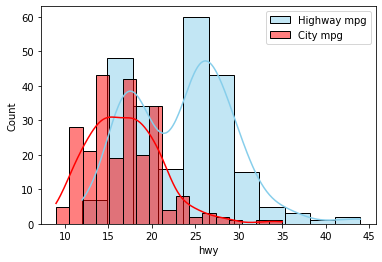

In [ ]:
# display two distributions on one graph w/ seaborn
sns.histplot(data = mpg, x = "hwy", color = "skyblue", label = "Highway mpg", kde = True)  # first distribution
sns.histplot(data  = mpg, x = "cty", color = "red", label = "City mpg", kde = True)  # second distribution

# note that we use a different function here!

plt.legend()  # add legend

## **Boxplots**

Boxplots summarise the distribution of a numeric variable for one or several groups. It allows to quickly get the median, quartiles and outliers. Let's use a boxplot to visualise the effect of car type (class) on highway mpg (hwy).

In [ ]:
# basic boxplot w/ ggplot2
%%R
ggplot(data = mpg) + 
    aes(x = class, y = hwy) + 
    geom_boxplot()

In [ ]:
# basic boxplot w/ seaborn
sns.boxplot(x = mpg['class'], y = mpg['hwy'])

In [ ]:
# boxplot with points overlaid w/ seaborn
sns.boxplot(x = mpg['class'], y = mpg['hwy'])  # boxplot

sns.stripplot(x = 'class', y = 'hwy', data = mpg, color = "orange", jitter = 0.2, size = 2.5)  # strip plot

## **Scatterplots**

Scatterplots display the relationship between 2 numeric variables. Each data point is represented as a circle or some other shape. Let's use a scatterplot to visualise the relationship between engine displacement (displ) and highway mpg (hwy). 

In [ ]:
# basic scatterplot w/ ggplot2
%%R
ggplot(data = mpg) +
    aes(x = displ, y = hwy) +
    geom_point() 

In [ ]:
# basic scatterplot w/ seaborn
sns.regplot(x = mpg["displ"], y = mpg["hwy"], fit_reg = False)  # fit_reg = fit regression line

In [ ]:
# scatter plot with coloured categorical variablggplot2 - categorical variable to color scatterplot
%%R
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

In [ ]:
# seaborn - categorical variable to color scatterplot
sns.lmplot(x = "displ", y = "hwy", data = mpg, fit_reg = False, hue = 'class', legend = False)  # hue = variables that define data subsets 

plt.legend(loc = 'upper right')  # set legend location

## **Barplot**

Barplots show the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value. Let's use a barplot to show the relationship between car type (class) and highway mpg (hwy).

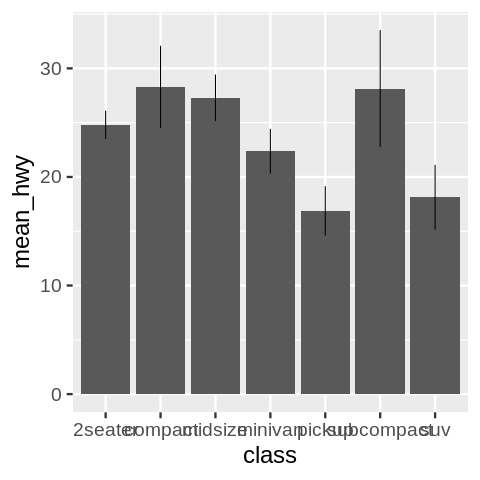

In [ ]:
# ggplot2
%%R

# summarise data
mpg_mean <- mpg %>%
group_by(class) %>%
summarise(mean_hwy = mean(hwy),
          sd_hwy = sd(hwy))

# plot summarised data
ggplot(data = mpg_mean) +
    aes(x = class, y = mean_hwy) +
    geom_col() +
    geom_errorbar(aes(ymin = mean_hwy - sd_hwy, ymax = mean_hwy + sd_hwy), width = 0)

<AxesSubplot:xlabel='class', ylabel='hwy'>

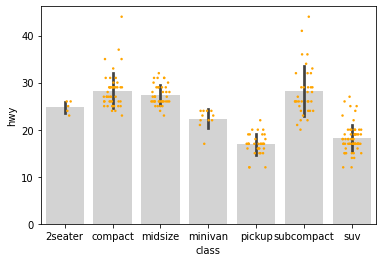

In [ ]:
# seaborn
sns.barplot(x = "class", y = "hwy", data = mpg, estimator = np.mean, ci = 'sd', capsize = 0, color = 'lightgrey')

In [ ]:
sns.stripplot(x = 'class', y = 'hwy', data = mpg, color = "orange", jitter = 0.2, size = 2.5)  # strip plot

## **Further Reading**

[A Dramatic Tour through Python's Data Visualisation Landscape (2016)](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)